# Machine Learning Model - Multinomial Naives Bayes

## Data import

In [3]:
import pandas as pd


In [4]:
data = pd.read_csv('../../cyberbullying/data/data.csv')
data.head()

,text,target
0,this is not creative those are the dictionar...,0.0
1,the term standard model is itself less npov...,0.0
2,true or false the situation as of march was...,0.0
3,next maybe you could work on being less conde...,0.0
4,this page will need disambiguation,0.0


## Data processing

In [5]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def remove_stop_words(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    text = [w for w in word_tokens if not w in stop_words]
    text= ' '.join(text)
    return text

In [6]:
data['text'] = data['text'].apply(remove_stop_words)
data.head()


,text,target
0,creative dictionary definitions terms insuranc...,0.0
1,term standard model less npov think wed prefer...,0.0
2,true false situation march saudi proposal land...,0.0
3,next maybe could work less condescending sugge...,0.0
4,page need disambiguation,0.0


In [7]:
from nltk.stem import WordNetLemmatizer

def lematize_words(text):
    token_words=word_tokenize(text)
    token_words
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in token_words]
    text = lemmatized
    text= ' '.join(text)
    return text


In [8]:
data['text'] = data['text'].apply(lematize_words)
data.head()

,text,target
0,creative dictionary definition term insurance ...,0.0
1,term standard model le npov think wed prefer n...,0.0
2,true false situation march saudi proposal land...,0.0
3,next maybe could work le condescending suggest...,0.0
4,page need disambiguation,0.0


In [9]:
from nltk.stem.porter import PorterStemmer
def stemmer_word(text):
    token_words=word_tokenize(text)
    token_words
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in token_words]
    text = stemmed
    text= ' '.join(text)
    return text

In [10]:
data['text'] = data['text'].apply(stemmer_word)
data.head()

,text,target
0,creativ dictionari definit term insur ensur pr...,0.0
1,term standard model le npov think wed prefer n...,0.0
2,true fals situat march saudi propos land peac ...,0.0
3,next mayb could work le condescend suggest rea...,0.0
4,page need disambigu,0.0


## Data separation train test and  data balancing

In [11]:
from sklearn.model_selection import train_test_split
X=data.text
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [12]:
def balance_df(X, y, ratio=0.3):
    df = pd.DataFrame({'text': X_train, 'target': y_train})
    df_class_0 = df[df['target'] == 0]
    df_class_1 = df[df['target'] == 1]
    df_class_1_len = df_class_1.shape[0]
    
    df_class_0_new = df_class_0.sample(int(df_class_1_len * (1-ratio)/ratio))
    df_new = pd.concat([df_class_0_new, df_class_1]).sample(frac=1).reset_index(drop=True)
    
    X = df_new['text']
    y = df_new['target']

    return X, y

#X_train, y_train = balance_df(X_train,y_train)


In [13]:
X_train.head()

39864     danni devito height list flat imdb articl he l...
207194    william shurtleff akiko aoyagi histori soybean...
129198    rt formerlegend deconstruct lemon tart would w...
112952    cours enough inform templat wikipediatempl loo...
184510    statement revert accord propon plr produc dram...
Name: text, dtype: object

## Model fitting

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(ngram_range = (2,2))

X_train_vec = tf_idf_vectorizer.fit_transform(X_train)

X_train_vec

<161108x918012 sparse matrix of type '<class 'numpy.float64'>'
	with 1592540 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(ngram_range = (2,2))

X_vec = tf_idf_vectorizer.fit_transform(X)

X_vec

<230155x1222449 sparse matrix of type '<class 'numpy.float64'>'
	with 2274557 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

In [46]:
nb_model = MultinomialNB()

cv_results2=cross_validate(nb_model,X_vec,y,cv=5,n_jobs=-1,scoring=['recall','precision','accuracy','f1'])

cv_results2

{'fit_time': array([0.63479662, 0.68172216, 0.67638636, 0.65417361, 0.2937336 ]),
 'score_time': array([0.25239944, 0.29599118, 0.25790548, 0.22481108, 0.09798074]),
 'test_recall': array([0.03646308, 0.03883318, 0.07055606, 0.0071103 , 0.0189608 ]),
 'test_precision': array([0.93896714, 0.93421053, 0.66267123, 0.66101695, 0.9122807 ]),
 'test_accuracy': array([0.88490365, 0.88514262, 0.88496883, 0.88125394, 0.88288327]),
 'test_f1': array([0.07020007, 0.07456678, 0.12753337, 0.01406926, 0.03714949])}

In [47]:
cv_results2['test_recall'].mean()

0.03438468550592525

In [16]:
nb_model = MultinomialNB()

cv_results=cross_validate(nb_model,X_train_vec,y_train,cv=5,n_jobs=-1,scoring=['recall','precision','accuracy','f1'])

cv_results

{'fit_time': array([0.25336051, 0.26385784, 0.25842166, 0.23927855, 0.15380788]),
 'score_time': array([0.10784245, 0.09985018, 0.09324312, 0.09037399, 0.0540607 ]),
 'test_recall': array([0.02837064, 0.02967205, 0.0252407 , 0.02941176, 0.03123373]),
 'test_precision': array([0.94782609, 0.92682927, 0.93269231, 0.94957983, 0.93023256]),
 'test_accuracy': array([0.88396127, 0.88402334, 0.88352678, 0.88408181, 0.88420595]),
 'test_f1': array([0.05509224, 0.05750315, 0.04915125, 0.0570563 , 0.06043818])}

In [17]:
cv_results['test_recall'].mean()

0.02878577612194837

In [18]:
X_test_vec = tf_idf_vectorizer.transform(X_test)

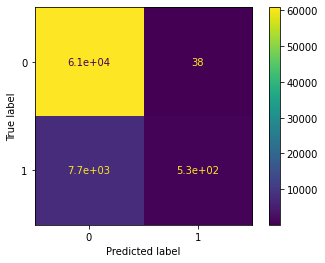

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train_vec,y_train)
y_pred = nb_model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();


In [20]:
y_pred_2=nb_model.predict_proba(X_test_vec)

In [21]:
import matplotlib.pyplot as plt

(array([3.6189e+04, 1.5992e+04, 1.1770e+04, 1.6490e+03, 9.4900e+02,
        6.3200e+02, 4.7900e+02, 3.6400e+02, 2.4700e+02, 1.7800e+02,
        1.3700e+02, 9.5000e+01, 9.6000e+01, 7.8000e+01, 8.0000e+01,
        4.1000e+01, 3.4000e+01, 2.6000e+01, 7.0000e+00, 4.0000e+00]),
 array([6.54452123e-08, 4.92840551e-02, 9.85680448e-02, 1.47852035e-01,
        1.97136024e-01, 2.46420014e-01, 2.95704004e-01, 3.44987993e-01,
        3.94271983e-01, 4.43555973e-01, 4.92839962e-01, 5.42123952e-01,
        5.91407942e-01, 6.40691931e-01, 6.89975921e-01, 7.39259911e-01,
        7.88543900e-01, 8.37827890e-01, 8.87111880e-01, 9.36395870e-01,
        9.85679859e-01]),
 <BarContainer object of 20 artists>)

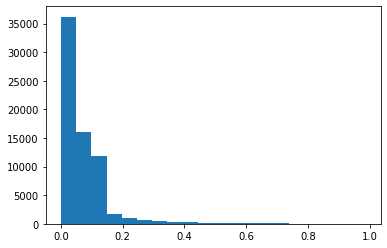

In [22]:
plt.hist(y_pred_2[:,1],bins=20)

In [23]:
y_pred_2[:10,1]

array([0.11924299, 0.12342008, 0.02474363, 0.02420554, 0.11924299,
       0.49253517, 0.1554804 , 0.00997891, 0.00489564, 0.00522377])

In [24]:
sum(y_pred_2[:,1]>0.1)

16573

In [25]:
y_test.size

69047

In [26]:
y_pred_tresh=y_test[y_pred_2[:,1]>0.12]

In [27]:
y_pred_tresh.size

8527

In [28]:
y_pred_tresh.sum()

3617.0

In [29]:
y_pred.sum()

570.0

In [30]:
X_test_vec[0]

<1x918012 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [31]:
y_test

121310    1.0
54562     0.0
89821     0.0
201556    0.0
138652    0.0
         ... 
59031     1.0
214748    0.0
39189     0.0
176987    0.0
12969     0.0
Name: target, Length: 69047, dtype: float64

In [32]:
y_pred_2[1]

array([0.87657992, 0.12342008])

In [33]:
y_pred.sum()

570.0

In [34]:
y_test.sum()

8214.0

In [35]:
import numpy as np

In [36]:
def conf_mx_metrics(cm):
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    recall = np.round_(TP/(TP+FN),3)
    precision = np.round_(TP/(TP+FP),3)
    accuracy = np.round_((TP+TN)/(TP+TN+FP+FN),3)
    
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Accuracy: {accuracy}")


In [37]:
conf_mx_metrics(cm)

Recall: 0.065
Precision: 0.933
Accuracy: 0.888


##  Parameters Grid Search

In [113]:
import sklearn

In [114]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (2,2)),'tfidf__min_df': (1, 5, 10),
    'nb__alpha': (0.1,1),}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "f1", cv=5)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [127]:
model=grid_search.best_estimator_


In [128]:
params=grid_search.best_params_
params

{'nb__alpha': 0.1, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 1)}

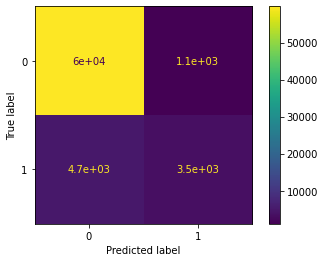

In [129]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();


In [130]:
conf_mx_metrics(cm)

Recall: 0.424
Precision: 0.767
Accuracy: 0.916


## Modifying the threshold

In [120]:
def threshold_modifier(model,xtest,threshold):
    ypred=model.predict_proba(xtest)[:,1]>threshold
    ypred=ypred.astype(int)
    return ypred

In [121]:
ypred3=threshold_modifier(model,X_test,0.4)

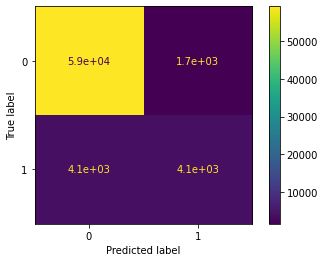

In [122]:
y_pred = ypred3
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();

In [123]:
conf_mx_metrics(cm)

Recall: 0.504
Precision: 0.711
Accuracy: 0.917


In [124]:
def conf_mx_metrics2(cm):
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    recall = np.round_(TP/(TP+FN),3)
    precision = np.round_(TP/(TP+FP),3)
    accuracy = np.round_((TP+TN)/(TP+TN+FP+FN),3)
    F1=(2*precision*recall)/(precision+recall)
    
    return recall, precision, accuracy, F1


In [125]:
def best_threshold(thresholds_list,model,x_test,y_test):
    recalls=[]
    accuracies=[]
    precisions=[]
    F1_scores=[]
    for threshold in thresholds:
        y_pred=threshold_modifier(model,x_test,threshold)
        cm = confusion_matrix(y_test, y_pred)
        recall, precision, accuracy,F1_score=conf_mx_metrics2(cm)
        recalls.append(recall)
        accuracies.append(accuracy)
        precisions.append(precision)
        F1_scores.append(F1_score)     

    metrics={'thresholds': thresholds,'recall':recalls, 'accuracy': accuracies, 'precision':precisions,'F1_score':F1_scores}
    return metrics    

In [126]:
thresholds=[0.2,0.25,0.3,0.35,0.5]
best_threshold(thresholds,model,X_test,y_test)

{'thresholds': [0.2, 0.25, 0.3, 0.35, 0.5],
 'recall': [0.698, 0.639, 0.591, 0.545, 0.424],
 'accuracy': [0.897, 0.907, 0.912, 0.915, 0.916],
 'precision': [0.552, 0.601, 0.643, 0.679, 0.767],
 'F1_score': [0.6164736000000001,
  0.6194177419354839,
  0.615904376012966,
  0.6046650326797386,
  0.5461091519731318]}